In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso, LassoCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
df = pd.read_csv('Netflix preprocessed data.csv')

In [3]:
df

,Open,High,Low,Close,Adj Close,Volume,year,month,day
0,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,2018,2,5
1,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,2018,2,6
2,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,2018,2,7
3,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,2018,2,8
4,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,2018,2,9
...,...,...,...,...,...,...,...,...,...
1004,401.970001,427.700012,398.200012,427.140015,427.140015,20047500,2022,1,31
1005,432.959991,458.480011,425.540009,457.130005,457.130005,22542300,2022,2,1
1006,448.250000,451.980011,426.480011,429.480011,429.480011,14346000,2022,2,2
1007,421.440002,429.260010,404.279999,405.600006,405.600006,9905200,2022,2,3


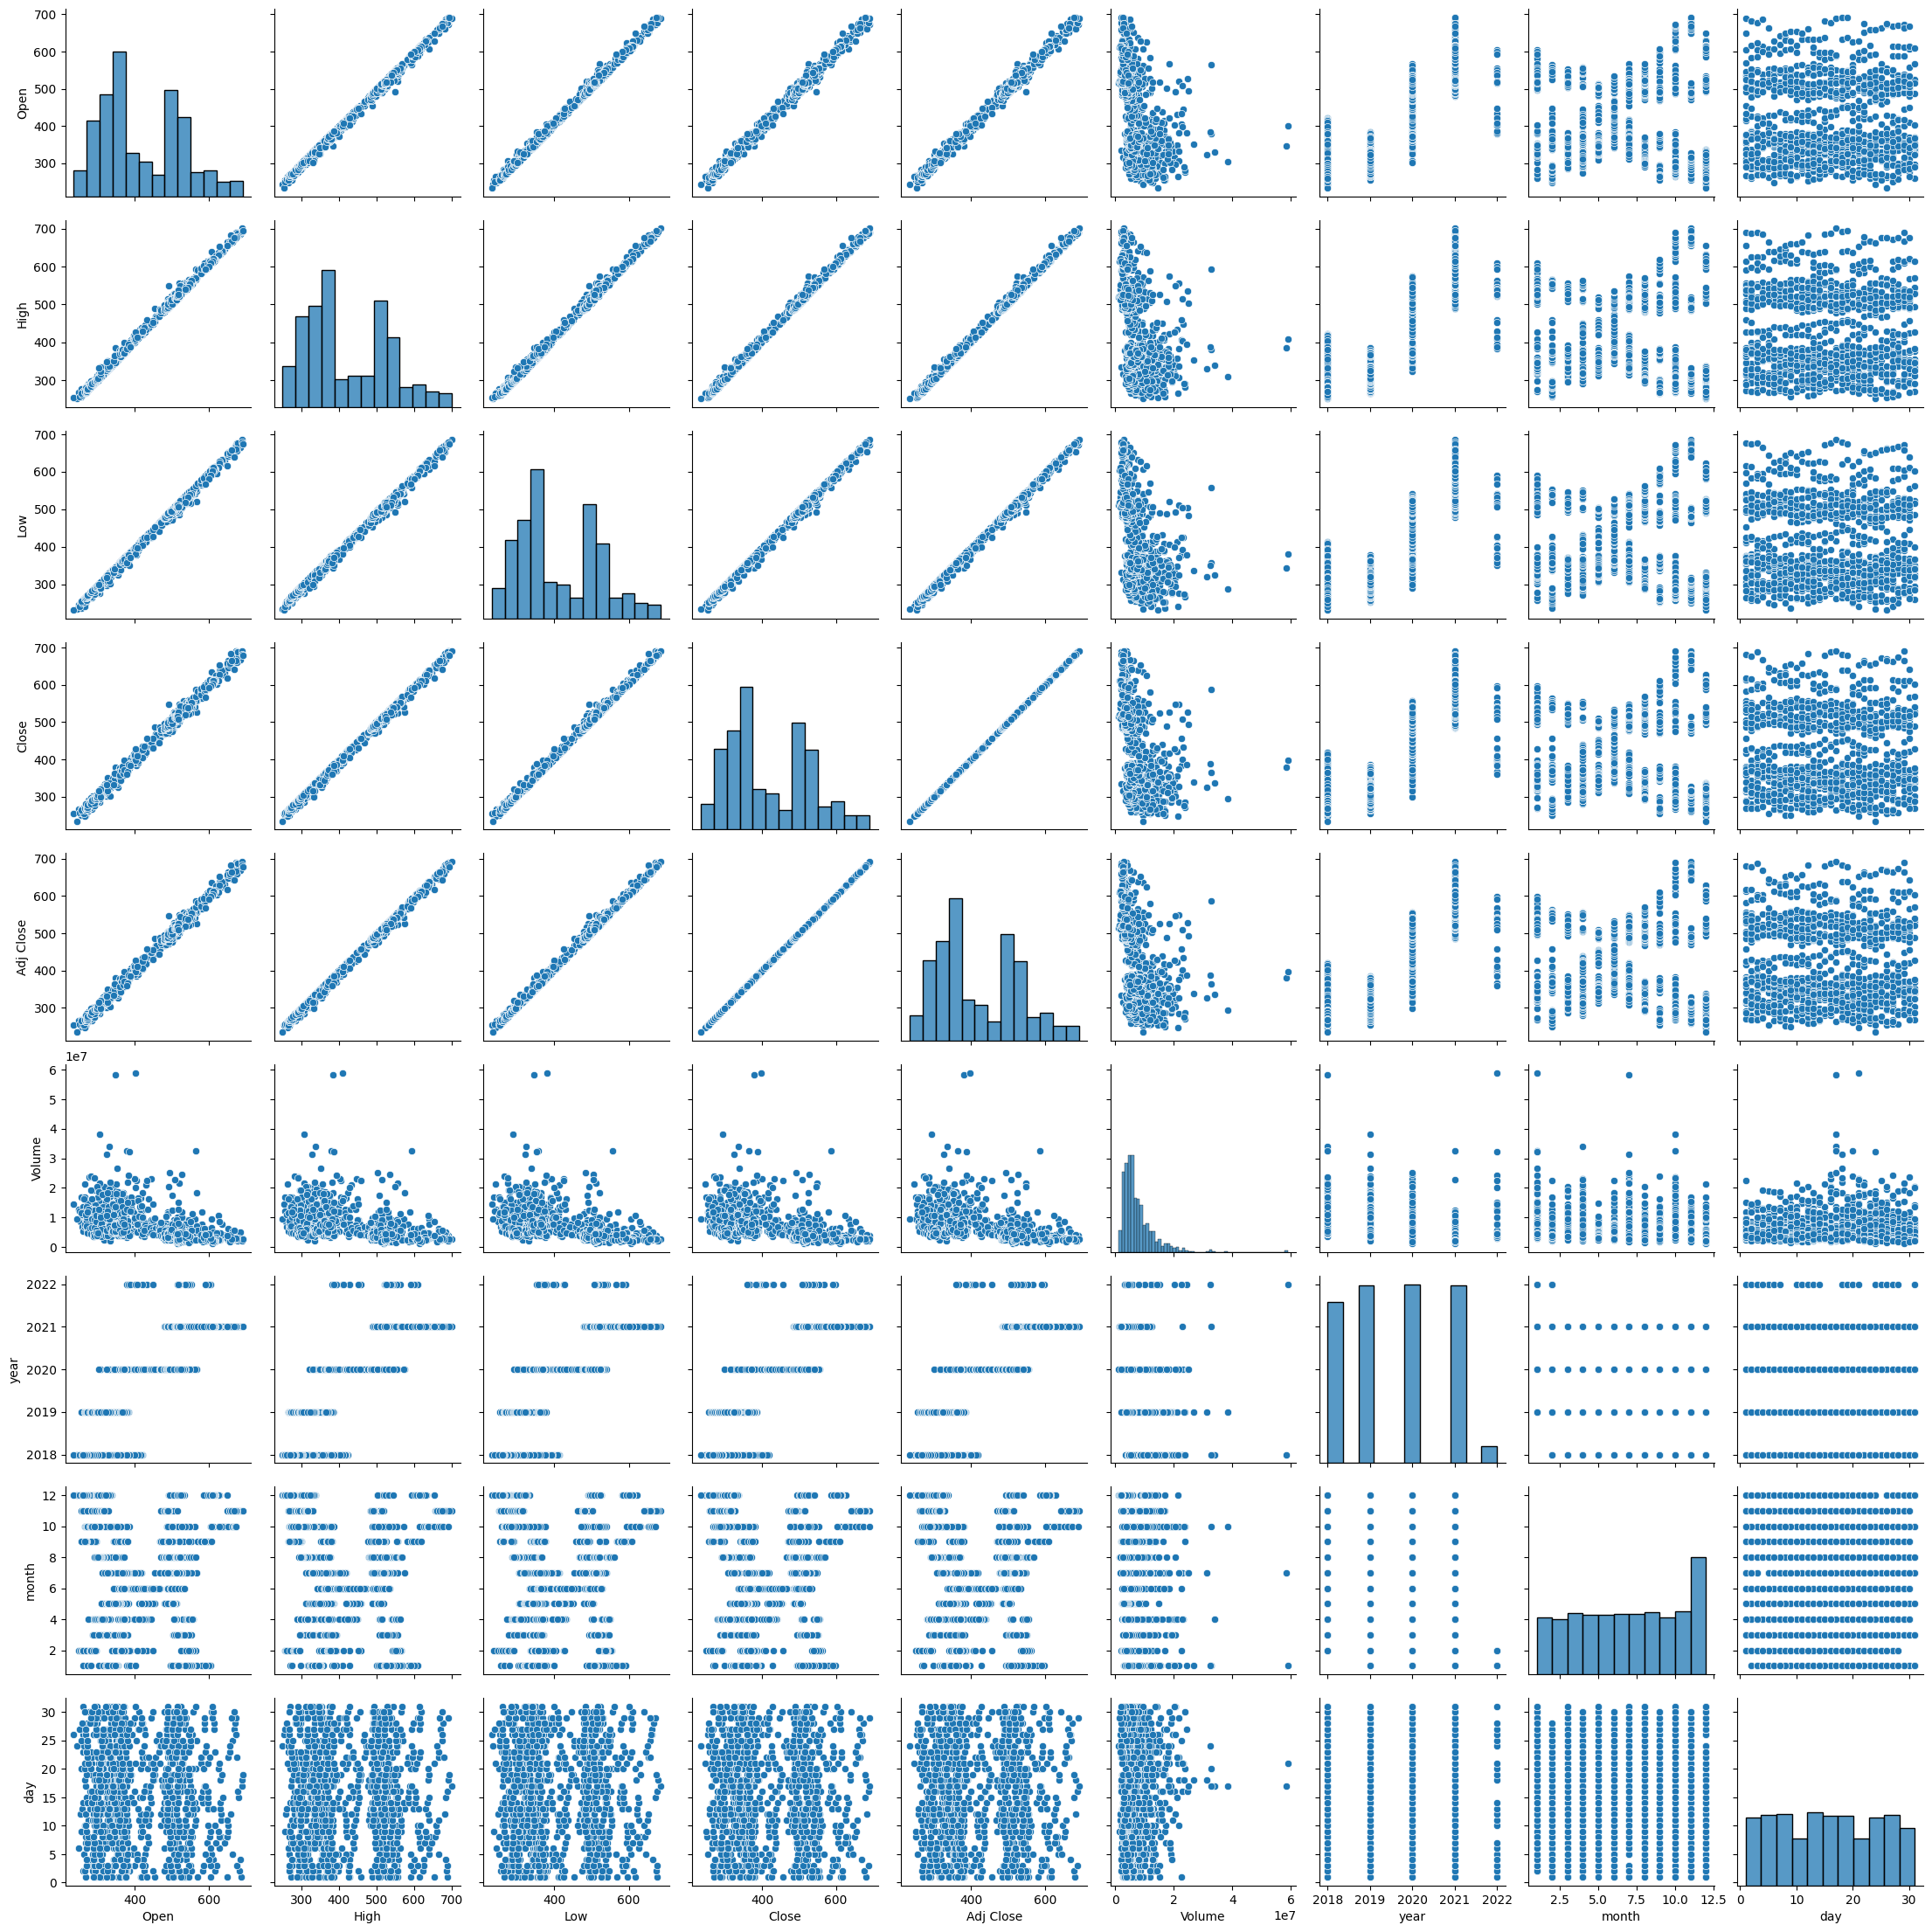

In [4]:
sns.pairplot(df)

In [5]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume,year,month,day
Open,1.000000,0.998605,0.998508,0.996812,0.996812,-0.415838,0.809151,0.130646,-0.014462
High,0.998605,1.000000,0.998203,0.998551,0.998551,-0.400699,0.810559,0.129469,-0.015013
Low,0.998508,0.998203,1.000000,0.998544,0.998544,-0.432116,0.809264,0.131444,-0.013412
Close,0.996812,0.998551,0.998544,1.000000,1.000000,-0.413362,0.810160,0.129959,-0.014870
Adj Close,0.996812,0.998551,0.998544,1.000000,1.000000,-0.413362,0.810160,0.129959,-0.014870
Volume,-0.415838,-0.400699,-0.432116,-0.413362,-0.413362,1.000000,-0.401308,-0.115963,0.090775
year,0.809151,0.810559,0.809264,0.810160,0.810160,-0.401308,1.000000,-0.120315,-0.015602
month,0.130646,0.129469,0.131444,0.129959,0.129959,-0.115963,-0.120315,1.000000,0.006903
day,-0.014462,-0.015013,-0.013412,-0.014870,-0.014870,0.090775,-0.015602,0.006903,1.000000


In [6]:
X = df[['Open','High','Low','year','month','day']]
Y = df['Close']

In [7]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [8]:
scaler = StandardScaler()

In [9]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
X_train_scaled

array([[-0.95795774, -0.99621081, -0.98250597, -1.36734953, -1.05978459,
         0.36585755],
       [-0.49193653, -0.53949597, -0.52257002, -0.50595135, -1.05978459,
         0.36585755],
       [-0.42424368, -0.43756706, -0.40242486,  0.35544683, -1.35277745,
        -0.54364432],
       ...,
       [ 1.14595279,  1.08478582,  1.10347946,  1.21684501,  0.11218686,
        -0.99839526],
       [-1.30563162, -1.28188617, -1.26138743, -0.50595135,  0.99116544,
         1.38904716],
       [-0.31648769, -0.2522664 , -0.30682959, -1.36734953,  0.11218686,
        -1.56683393]])

In [11]:
X_test_scaled

array([[ 0.7260733 ,  0.77214258,  0.79651466,  0.35544683,  0.40517972,
        -1.33945846],
       [ 0.78870081,  0.75248818,  0.68520381,  0.35544683,  0.40517972,
        -0.99839526],
       [ 0.80619957,  0.8092575 ,  0.80516281,  1.21684501, -1.64577031,
        -0.20258112],
       ...,
       [-1.21279563, -1.19056157, -1.28584424, -1.36734953,  1.57715117,
        -1.33945846],
       [-0.52140806, -0.50393496, -0.46305522, -0.50595135, -0.180806  ,
         1.27535943],
       [-0.62916405, -0.63877374, -0.61639843, -1.36734953, -0.47379887,
         1.5027349 ]])

In [12]:
l_regg = LinearRegression()

In [13]:
l_regg.fit(X_train_scaled,Y_train)

LinearRegression()

In [14]:
y_pred = l_regg.predict(X_test_scaled)

In [15]:
y_pred

array([508.39018046, 492.92014825, 507.25890819, 381.41261968,
       318.57142192, 480.24225913, 493.34798707, 321.50911547,
       361.03935508, 328.2698613 , 525.85648364, 330.84995454,
       585.82536107, 313.95235537, 339.02387412, 545.88388719,
       534.13205228, 617.4435642 , 352.83835544, 393.82843058,
       390.50527423, 376.23689205, 267.64289959, 354.15269744,
       435.69092594, 371.90788524, 307.92551619, 353.9729036 ,
       298.80775856, 509.09498162, 564.64551238, 515.04470883,
       411.85537935, 338.30162046, 507.54665101, 349.87203326,
       587.36020438, 291.37437416, 361.25912754, 364.47580243,
       356.4681096 , 351.71573607, 345.73169996, 609.28652721,
       370.7748767 , 361.84941552, 310.39567873, 634.79099119,
       502.97332542, 548.42352599, 493.0296076 , 517.6859421 ,
       310.24851154, 490.52346491, 425.12632844, 569.37098232,
       310.25110122, 306.87486892, 329.06488723, 318.19754571,
       508.34002192, 278.61629514, 283.87867168, 484.85

In [16]:
r2 = r2_score(Y_test,y_pred)
print(r2*100)

99.86268798267758


<Axes: xlabel='Close'>

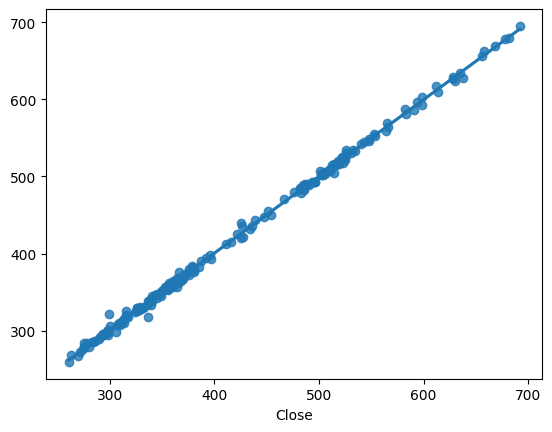

In [17]:
sns.regplot(x = Y_test,y =y_pred)


In [18]:
lass_regg = Lasso()

In [19]:
lass_regg.fit(X_train_scaled,Y_train)

Lasso()

In [20]:
lass_regg.coef_

array([ 0.        , 55.79853251, 51.43170592,  0.        ,  0.        ,
       -0.        ])

In [21]:
lass_regg.intercept_

np.float64(419.67565023420076)

In [22]:
y_pred = lass_regg.predict(X_test_scaled)

In [23]:
y_pred

array([503.72618091, 496.90458718, 506.24192815, 383.17283535,
       321.36617322, 479.70405535, 488.97016142, 316.385197  ,
       359.81819295, 328.55815415, 520.77982592, 333.70165397,
       589.29141913, 315.38202931, 337.41682285, 548.0018513 ,
       534.39437607, 613.77117897, 356.48000346, 396.36929335,
       387.08394776, 377.2642435 , 267.83471208, 353.04059008,
       431.61637253, 367.35653972, 309.96926312, 357.33032642,
       301.02620984, 509.12123403, 560.30247196, 511.45112912,
       415.28268003, 335.41363523, 507.95709963, 348.58586738,
       578.46529406, 293.34671603, 360.76832744, 367.42580079,
       353.84646406, 354.92172996, 347.06974965, 610.11331175,
       373.61078077, 363.67260599, 309.49921987, 621.7802773 ,
       504.32918511, 547.73704851, 489.01483994, 511.93460629,
       311.4502115 , 488.98085446, 424.97028834, 572.6655958 ,
       312.57903502, 312.8086753 , 327.08719331, 317.44316922,
       509.58752492, 283.99161621, 282.94964916, 484.75

In [24]:
r2 = r2_score(Y_test,y_pred)
print(r2*100)

99.81263320084327


In [25]:
ridge_regg = Ridge()

In [26]:
ridge_regg.fit(X_train_scaled,Y_train)

Ridge()

In [27]:
y_pred = ridge_regg.predict(X_test_scaled)

In [28]:
r2 = r2_score(Y_test,y_pred)
print(r2*100)

99.85142324602752


In [29]:
lassocv_regg = LassoCV(cv = 5)

In [30]:
lassocv_regg.fit(X_train_scaled,Y_train)

LassoCV(cv=5)

In [31]:
y_pred_lc = lassocv_regg.predict(X_test_scaled)

We shall take the model made using lasso regression since its accuracy is sligtly low considering overfitting

In [32]:
pickle.dump(lass_regg,open('Netflix Stock Prediction Model.pkl','wb'))

In [34]:
pickle.dump(scaler,open('Scaler model.pkl','wb'))